In [1]:
#Libraries that will be used in this project

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
import os
from six.moves.urllib.request import urlretrieve
from sklearn import cross_validation
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.grid_search import RandomizedSearchCV

C:\Users\Aman Aggarwal\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Aman Aggarwal\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [11]:
#Downloading the dataset from the website and storing it on the local drive 

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/"
last_percent_reported = None

def download_progress_hook(count, blockSize, totalSize):
    """
    A hook to report the progress of a download. This is mostly intended for users with
    slow internet connections. Reports every 10% change in download progress.
    """
    global last_percent_reported
    percent = int(count * blockSize * 100 / totalSize)

    if last_percent_reported != percent:
        if percent % 20 == 0:
            sys.stdout.write("..")
            sys.stdout.flush()
        else:
            sys.stdout.write(".")
            sys.stdout.flush()       
        last_percent_reported = percent
        
newpath = r'C:\Users\Aman Aggarwal\Desktop\Udacity\Capstone_Abalone' 
        
def maybe_download(filename, force=False):
    """
    Download a file, if not present and make sure it's of the right size.
    """
    if not os.path.exists(newpath):
        os.makedirs(newpath)
    elif os.path.exists(newpath):
        fullfilename = os.path.join(newpath, filename)
        if force or not os.path.exists(fullfilename):
            print('Attempting to download: ', filename) 
            fullfilename, _ = urlretrieve(url + filename, fullfilename, reporthook=download_progress_hook)
            print('\nDownload Complete!')
        else:
            print(filename, 'is already downloaded. Skipped.')
        return filename

abalone_data = maybe_download('abalone.data')
abalone_names = maybe_download('abalone.names')

('abalone.data', 'is already downloaded. Skipped.')
('abalone.names', 'is already downloaded. Skipped.')


In [20]:
#Giving names to the columns

columns = ["sex", "length", "diameter", "height", "whole weight", 
                "shucked weight", "viscera weight", "shell weight", "rings"]
data = pd.read_csv("abalone.data", names=columns)
print("Number of samples: %d" % len(data))
data.head()

Number of samples: 4177


,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [21]:
#converting "Sex" variable from Categorical to Boolean variable
for label in "MFI":
    data[label] = data["sex"] == label
del data["sex"]

In [15]:
#Checking the data if the conversion has happened successfully

data.head()

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings,M,F,I
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,True,False,False
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,True,False,False
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,False,True,False
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,True,False,False
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,False,False,True


In [22]:
#Storing the values of "rings" attribute into y for testing oin future

y = data.rings.values

In [23]:
# Removing "rings" attribute from data, so we can convert all the dataframe to a numpy 2D array.

del data["rings"] 
X = data.values.astype(np.float)

In [8]:
# Splitting data into training and testing set : 75%/25% by default

train_X, test_X, train_y, test_y = cross_validation.train_test_split(X, y) 

In [24]:
# Creating an estimator
model = DecisionTreeRegressor()

# Fitting the estimator to the data
model.fit(train_X, train_y)

# Applying the model to the testing and training data
predicted_test_y = model.predict(test_X)
predicted_train_y = model.predict(train_X)

In [25]:
# Creating a plot between predicted class and true class

def scatter_y(true_y, predicted_y):
    """Scatter-plot the predicted vs true number of rings
    
    Plots:
       * predicted vs true number of rings
       * perfect agreement line
       * +2/-2 number dotted lines

    Returns the root mean square of the error
    """
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(true_y, predicted_y, '.k')
    
    ax.plot([0, 30], [0, 30], '--k')
    ax.plot([0, 30], [2, 32], ':k')
    ax.plot([2, 32], [0, 30], ':k')
    
    rms = (true_y - predicted_y).std()
    
    ax.text(25, 3, "Root Mean Square Error = %.2g" % rms, ha='right', va='bottom')

    ax.set_xlim(0, 30)
    ax.set_ylim(0, 30)
    
    ax.set_xlabel('True number of rings')
    ax.set_ylabel('Predicted number of rings')
    
    return rms

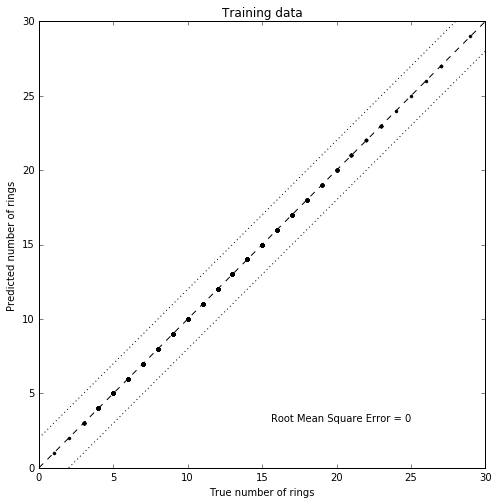

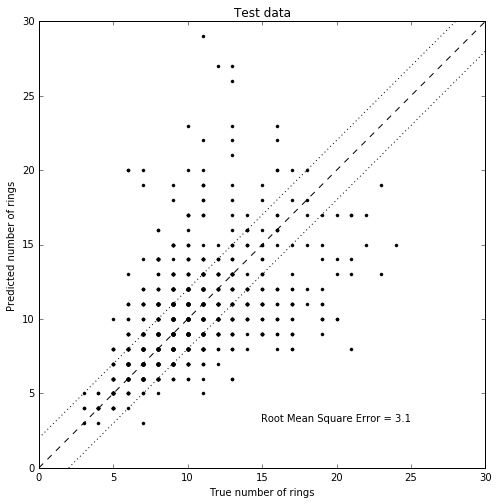

In [26]:
#Plotting the scatterplot

scatter_y(train_y, predicted_train_y)
plt.title("Training data")
scatter_y(test_y, predicted_test_y)
plt.title("Test data");

In [27]:
# Creating an estimator with parameter 'max_depth = 10'
model = DecisionTreeRegressor(max_depth=10)

# Fitting the estimator to the data
model.fit(train_X, train_y)

# Applyng the model to the test and train data
predicted_test_y = model.predict(test_X)
predicted_train_y = model.predict(train_X)

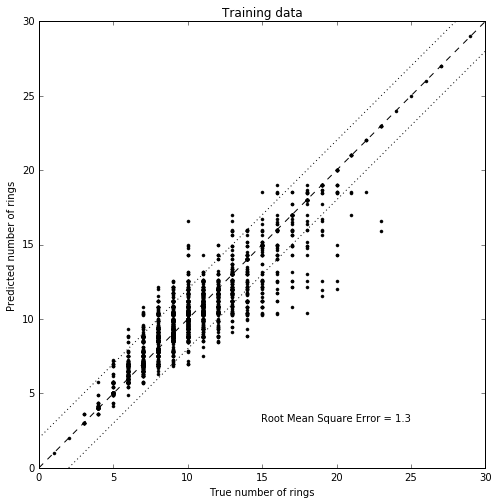

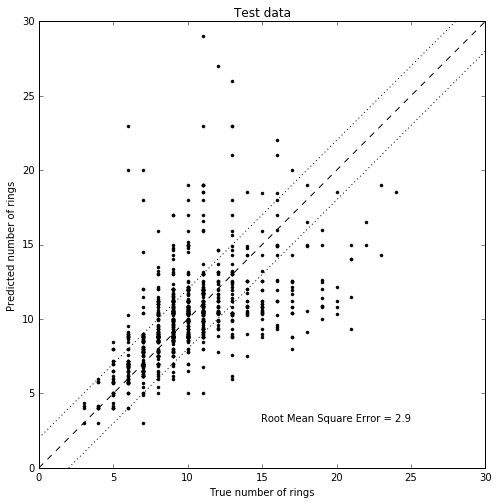

In [28]:
#Plotting the scatterplot
scatter_y(train_y, predicted_train_y)
plt.title("Training data")
rms_decision_tree = scatter_y(test_y, predicted_test_y)
plt.title("Test data");

In [29]:
data_percentage_array = np.linspace(10, 100, 10)

In [30]:
# Creating a plot - Training error vs Validation error
train_error = []
test_error = []
for data_percentage in data_percentage_array:
    model = DecisionTreeRegressor(max_depth=10)
    number_of_samples = int(data_percentage / 100. * len(train_y))
    model.fit(train_X[:number_of_samples,:], train_y[:number_of_samples])

    predicted_train_y = model.predict(train_X)
    predicted_test_y = model.predict(test_X)

    train_error.append((predicted_train_y - train_y).std())
    test_error.append((predicted_test_y - test_y).std())

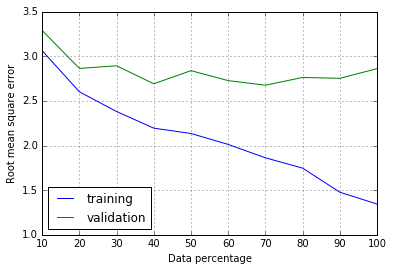

In [31]:
#Plotting the graph
plt.plot(data_percentage_array, train_error, label='training')
plt.plot(data_percentage_array, test_error, label='validation')
plt.grid()
plt.legend(loc=3)
plt.xlabel('Data percentage')
plt.ylabel('Root mean square error');

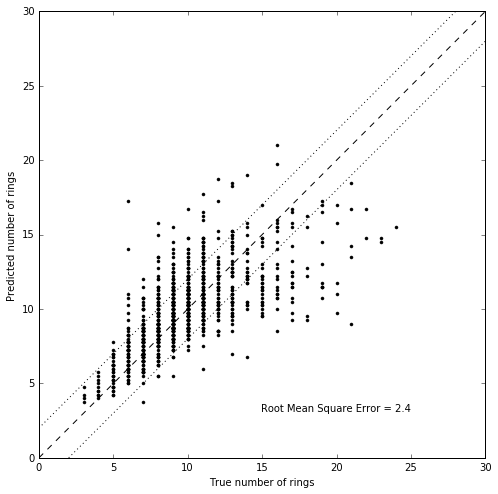

In [44]:
# Creating an advanced estimator with parameter 'n_estimator = 4'
model = RandomForestRegressor(n_estimators=4)
model.fit(train_X, train_y)
predicted_test_y = model.predict(test_X)
rms_random_forest = scatter_y(test_y, predicted_test_y)

In [45]:
#Printing the results
print("Root Mean Square error decreases from %.2g to %.2g." % (rms_decision_tree, rms_random_forest))

Root Mean Square error decreases from 2.9 to 2.4.


In [46]:
#Changing the parameter value of the estimator
model = RandomForestRegressor(n_estimators=100)

In [47]:
n_features = X.shape[1]

In [53]:
#Using RandomizedSearchCV
grid = RandomizedSearchCV(model, n_iter=20, 
            param_distributions=dict(
                                          max_depth=np.arange(5,20+1), 
                                          max_features=np.arange(1, n_features+1)
                                    )
         )
grid.fit(X, y)
print(grid.best_params_)

{'max_features': 5, 'max_depth': 10}


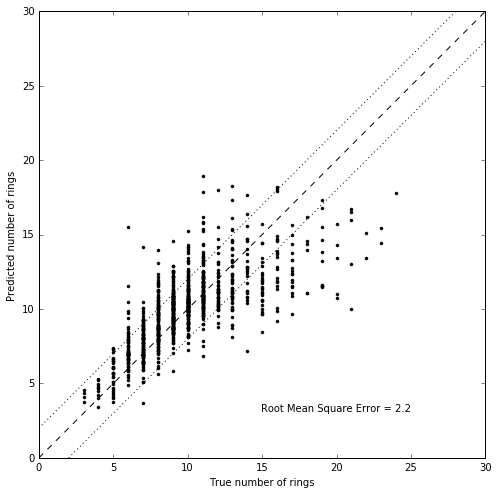

In [54]:
#predicting the RMSE

model = RandomForestRegressor(max_features=grid.best_params_["max_features"],
                              max_depth=grid.best_params_["max_depth"])
model.fit(train_X, train_y)
predicted_test_y = model.predict(test_X)
rms_optimized_random_forest = scatter_y(test_y, predicted_test_y)

In [55]:
#Printing the results
print("Root Mean Square error decreases from %.2g to %.2g." % (rms_random_forest, rms_optimized_random_forest))

Root Mean Square error decreases from 2.4 to 2.2.
